In [687]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [688]:
df=pd.read_csv("Titanic-Dataset.csv")

In [689]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [690]:
df.shape

(891, 12)

In [691]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Feature Engineering**

In [692]:
df=df.drop(columns=["PassengerId"])

PassengerId is dropped that carries no value

In [693]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [694]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11196\3717664479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


Only 2 missing values in 'Embarked'. Replace with mode from where most of the passengers took off.

In [695]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [696]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [697]:
df['Name'] = df['Name'].str.extract(r',([^\.]+)\.')

In [698]:
# Strip spaces
df['Title'] = df['Name'].str.strip()
df=df.drop(columns=['Name'])

Only letters between , and . were extracted to observe the designation of people from Name

In [699]:
# Define mapping
title_mapping = {
    'Mr': 'Mr',
    'Sir': 'Mr',
    'Mrs': 'Mrs',
    'Mme': 'Mrs',
    'Ms': 'Mrs',
    'Lady': 'Mrs',
    'the Countess': 'Mrs',
    'Miss': 'Miss',
    'Mlle': 'Miss',
    'Master': 'Master',
    'Don': 'Other',
    'Rev': 'Other',
    'Dr': 'Other',
    'Jonkheer': 'Other',
    'Major': 'Military',
    'Col': 'Military',
    'Capt': 'Military'
}

# Apply mapping
df['Title'] = df['Title'].map(title_mapping)
# Optional: check distribution
df['Title'].value_counts()


Title
Mr          518
Miss        184
Mrs         129
Master       40
Other        15
Military      5
Name: count, dtype: int64

Titles were grouped into Mr, Mrs, Miss, Master, Military and others for reducing sparsity and clean segmentation

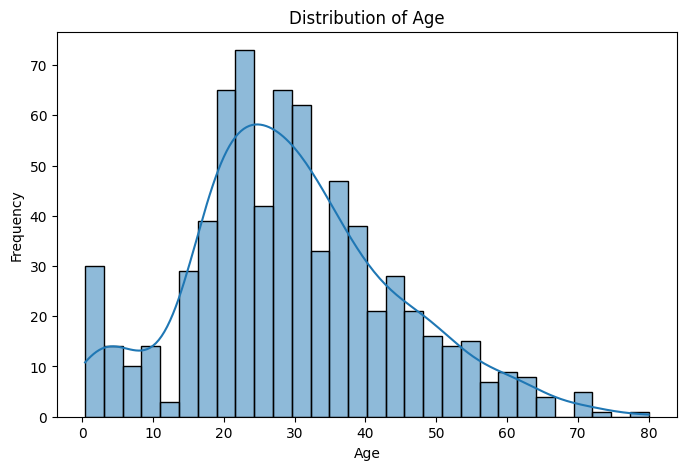

In [700]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Age is rightly skewed, so mean is pulled more towards right tail.  
It is better to replace with median value to keep the central tendency of majority of data

In [701]:
# Impute missing ages with the median age of their respective Title group
title_ages = dict(df.groupby('Title')['Age'].median())
df['Age'] = df['Age'].fillna(df['Title'].apply(lambda x: title_ages[x]))

Missing Age is replaced with median of respective title groups as title and age strongly correlates in society

In [702]:
df["Family_Size"]=1+df["Parch"]+df["SibSp"]
df=df.drop(columns=['Parch','SibSp'])

Family size extracted by passenger her/himself + Sibling or Spouse + Parents or Children

In [703]:
df['Deck'] = df['Cabin'].str[0]
df=df.drop(columns=['Cabin'])

The Decks play vital role than Cabin and easier to analysis

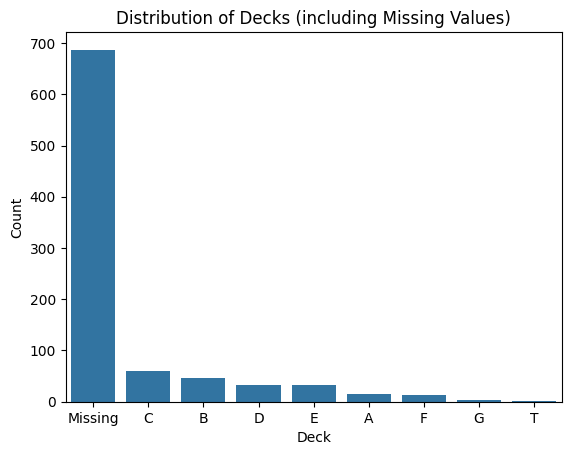

In [704]:
df['Deck'] = df['Deck'].fillna('Missing')

sns.countplot(data=df, x='Deck', order=df['Deck'].value_counts().index)
plt.title('Distribution of Decks (including Missing Values)')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.show()

Null values replaced with 'Missing'

Now, Let us use Random Forest Classifier except 'Missing' value, as Deck has Categorical values and replace the predicted Deck values with the Missing values.

In [705]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [706]:
# Separate known and unknown Deck rows
known_deck = df[df['Deck'] != 'Missing']
unknown_deck = df[df['Deck'] == 'Missing']

# Encode Deck
le = LabelEncoder()
known_deck['Deck_enc'] = le.fit_transform(known_deck['Deck'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11196\1919594987.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_deck['Deck_enc'] = le.fit_transform(known_deck['Deck'])


In [707]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family_Size','Title']
X_train = pd.get_dummies(known_deck[features])
y_train = known_deck['Deck_enc']

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [708]:
# Create dummy variables for the features
X_test = pd.get_dummies(df.loc[df['Deck'] == 'Missing', features])

# Align columns with training data (fill missing columns with 0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Predict the missing Deck values
preds = rf.predict(X_test)
preds_deck = le.inverse_transform(preds)

# Assign the predicted Decks directly to the original DataFrame
df.loc[df['Deck'] == 'Missing', 'Deck'] = preds_deck


In [709]:
df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family_Size,Deck
0,0,3,male,22.0,A/5 21171,7.2500,S,Mr,2,F
1,1,1,female,38.0,PC 17599,71.2833,C,Mrs,2,C
2,1,3,female,26.0,STON/O2. 3101282,7.9250,S,Miss,1,E
3,1,1,female,35.0,113803,53.1000,S,Mrs,2,C
4,0,3,male,35.0,373450,8.0500,S,Mr,1,E


In [710]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
Title          0
Family_Size    0
Deck           0
dtype: int64

Finally! We have successfully handled all the missing values

In [711]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [712]:
X.head()

,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family_Size,Deck
0,3,male,22.0,A/5 21171,7.2500,S,Mr,2,F
1,1,female,38.0,PC 17599,71.2833,C,Mrs,2,C
2,3,female,26.0,STON/O2. 3101282,7.9250,S,Miss,1,E
3,1,female,35.0,113803,53.1000,S,Mrs,2,C
4,3,male,35.0,373450,8.0500,S,Mr,1,E


In [713]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [714]:
for col in X.columns:
    print(f'{col} : {df[col].unique()}\n')


Pclass : [3 1 2]

Sex : ['male' 'female']

Age : [22.   38.   26.   35.   30.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   21.   40.   66.   42.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.    3.5  17.
 32.   16.   25.    0.83 33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]

Ticket : ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Pari

Let us extract valuable information from ticket

In [715]:
# Count how many passengers share the same ticket
df['Ticket_group_size'] = df.groupby('Ticket')['Ticket'].transform('count')

# Optional: check the result
df[['Ticket', 'Ticket_group_size']].head(10)


,Ticket,Ticket_group_size
0,A/5 21171,1
1,PC 17599,1
2,STON/O2. 3101282,1
3,113803,2
4,373450,1
5,330877,1
6,17463,1
7,349909,4
8,347742,3
9,237736,2


There are Groups with same ticket availed at the same time.

In [716]:
def get_social_context(row):
    if row['Family_Size'] == 1 and row['Ticket_group_size'] == 1:
        return 'Alone'
    elif 2 <= row['Family_Size'] <= 4 and row['Ticket_group_size'] == row['Family_Size']:
        return 'Small Family'
    elif row['Family_Size'] > 4 and row['Ticket_group_size'] == row['Family_Size']:
        return 'Large Family'
    else:
        return 'Group with Non-Family'

# create the new column
df['Grouping'] = df.apply(get_social_context, axis=1)

In [717]:
# Optional: check distribution
df['Grouping'].value_counts()

Grouping
Alone                    462
Group with Non-Family    288
Small Family             122
Large Family              19
Name: count, dtype: int64

From Family_Size and Group_Size, new feature 'Social_Context' was extracted to see what kind of groups survived.

Logic is =>  
if:  
family size=1, group size=1, the passenger is alone  
family size= 2 to 4, group size=family size, they are small family  
family size= more than 4, group size=family size, they are large family  
  
else:  
family size is not equal to group size, that means the group is not family, they may be friends or crew members. So, Group with Non-Family

In [718]:
df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family_Size,Deck,Ticket_group_size,Grouping
0,0,3,male,22.0,A/5 21171,7.2500,S,Mr,2,F,1,Group with Non-Family
1,1,1,female,38.0,PC 17599,71.2833,C,Mrs,2,C,1,Group with Non-Family
2,1,3,female,26.0,STON/O2. 3101282,7.9250,S,Miss,1,E,1,Alone
3,1,1,female,35.0,113803,53.1000,S,Mrs,2,C,2,Small Family
4,0,3,male,35.0,373450,8.0500,S,Mr,1,E,1,Alone


In [719]:
df=df.drop(columns=['Ticket','Family_Size','Ticket_group_size'])

In [720]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Deck,Grouping
0,0,3,male,22.0,7.2500,S,Mr,F,Group with Non-Family
1,1,1,female,38.0,71.2833,C,Mrs,C,Group with Non-Family
2,1,3,female,26.0,7.9250,S,Miss,E,Alone
3,1,1,female,35.0,53.1000,S,Mrs,C,Small Family
4,0,3,male,35.0,8.0500,S,Mr,E,Alone


In [721]:
df['Fare'] = df['Fare'].round(2)

Fare column is rounded by 2 decimal values for convenience

In [722]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Deck,Grouping
0,0,3,male,22.0,7.25,S,Mr,F,Group with Non-Family
1,1,1,female,38.0,71.28,C,Mrs,C,Group with Non-Family
2,1,3,female,26.0,7.92,S,Miss,E,Alone
3,1,1,female,35.0,53.10,S,Mrs,C,Small Family
4,0,3,male,35.0,8.05,S,Mr,E,Alone


In [723]:
df['Sex'] = df.apply(lambda row: 'child' if row['Age'] < 16 else row['Sex'], axis=1)


Categorized all into child under 16, male and female

In [724]:
df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Deck,Grouping
0,0,3,male,22.0,7.25,S,Mr,F,Group with Non-Family
1,1,1,female,38.0,71.28,C,Mrs,C,Group with Non-Family
2,1,3,female,26.0,7.92,S,Miss,E,Alone
3,1,1,female,35.0,53.10,S,Mrs,C,Small Family
4,0,3,male,35.0,8.05,S,Mr,E,Alone
5,0,3,male,30.0,8.46,Q,Mr,F,Alone
6,0,1,male,54.0,51.86,S,Mr,E,Alone
7,0,3,child,2.0,21.08,S,Master,F,Group with Non-Family
8,1,3,female,27.0,11.13,S,Mrs,G,Small Family
9,1,2,child,14.0,30.07,C,Mrs,D,Small Family


In [725]:
cat_cols=['Pclass','Sex','Embarked','Deck','Grouping','Title']
num_cols=['Age','Fare']

**EDA**

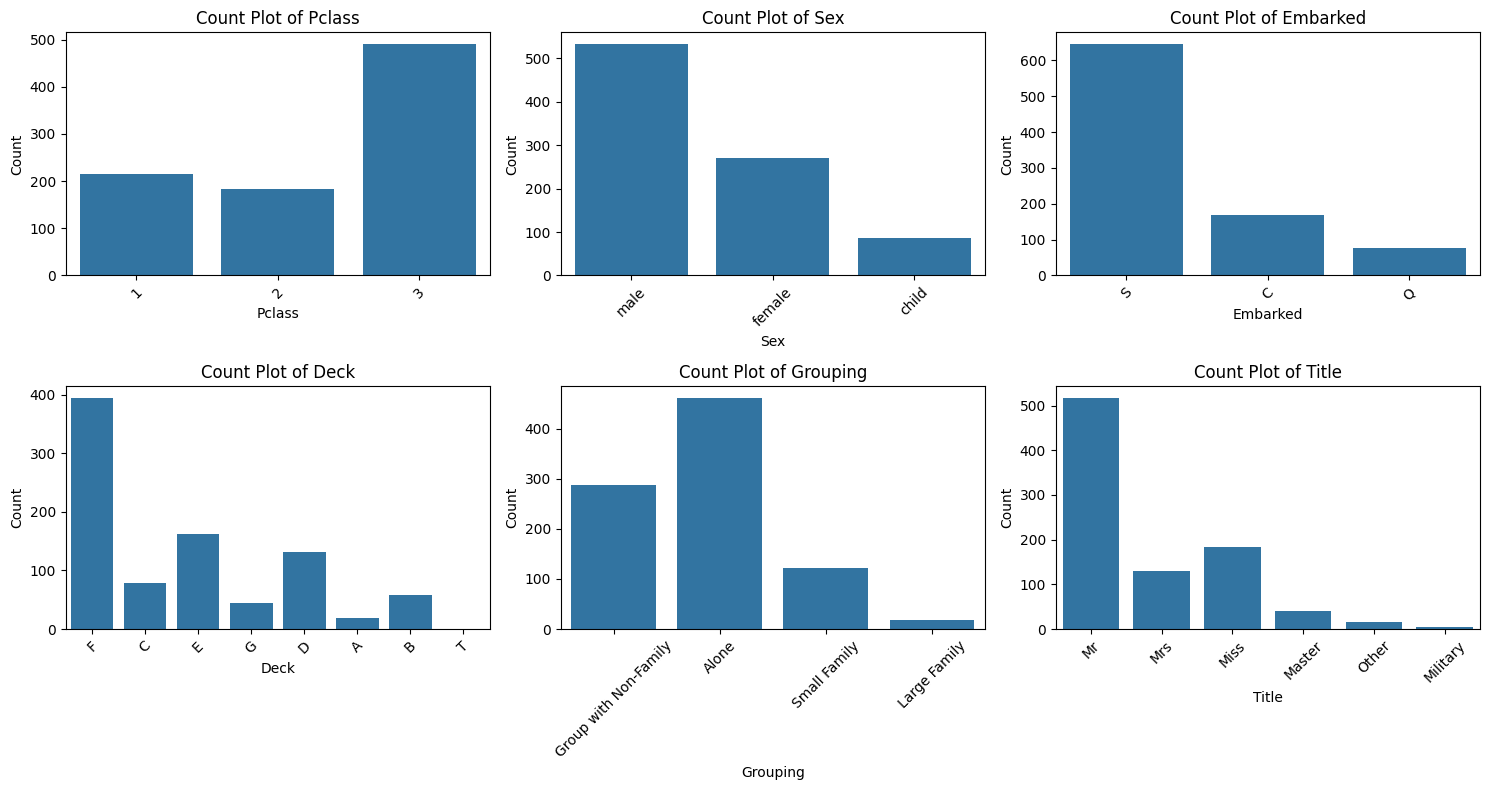

In [726]:
# Define number of categorical columns
n_cols = len(cat_cols)

# Choose subplot grid size (e.g., 2 rows × 3 columns for 6 plots)
n_rows = (n_cols + 2) // 3  # automatically adjusts for 6 or fewer columns

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # flatten so we can iterate easily

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Lower class passengers were more as it is the real-world scenerio.   
   
Most of the passengers embarked from S as it was the primary departure port.   
    
S - Southampton, England (the primary departure port)   
C - Cherbourg, France    
Q - Queenstown, Ireland (now known as Cobh)     

Married men (Mr) were the most among all titles.   
  
Deck 'F' had the most number of passengers as its location was almost at the middle of the ship which might have been chosen for staying of the passengers.  
   
Most of the passengers travelled Alone, then Friends or groups, then small family and the least was large family which is expected as real-world scenerio.  

Q1: What percentage of passengers survived as a whole?

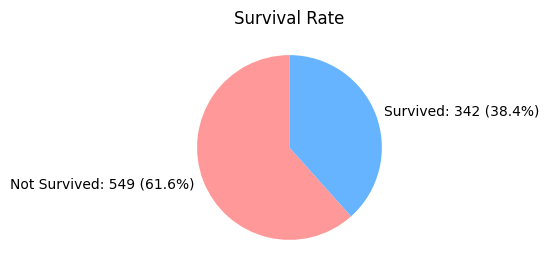

In [727]:
survival_counts = df['Survived'].value_counts()
# Prepare labels with counts and percentages
labels = [f'Not Survived: {survival_counts[0]} ({survival_counts[0]/survival_counts.sum()*100:.1f}%)',
          f'Survived: {survival_counts[1]} ({survival_counts[1]/survival_counts.sum()*100:.1f}%)']

# Pie chart
plt.figure(figsize=(3,3))
plt.pie(survival_counts, labels=labels, colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Survival Rate')
plt.show()

Q2: What type of gender (male,female,child) survived more?

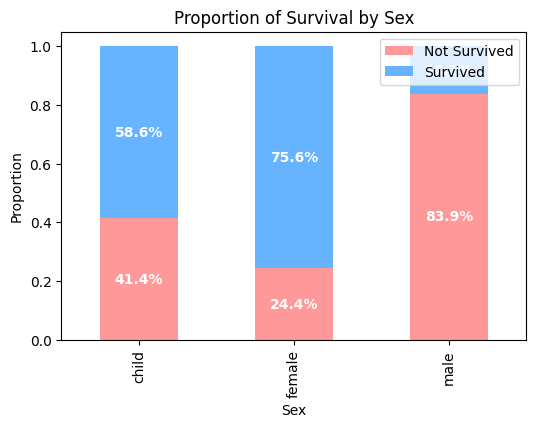

In [728]:
# Calculate survival proportion by Sex
survival_by_sex = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack(fill_value=0)

# Plot stacked bar chart
ax = survival_by_sex.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'], figsize=(6,4))

plt.ylabel('Proportion')
plt.title('Proportion of Survival by Sex')
plt.legend(['Not Survived', 'Survived'], loc='upper right')

# Annotate percentages inside bars
for i, sex in enumerate(survival_by_sex.index):
    bottom = 0
    for j, surv in enumerate([0,1]):  # 0: Not Survived, 1: Survived
        value = survival_by_sex.loc[sex, surv]
        if value > 0:  # only annotate if the segment exists
            ax.text(i, bottom + value/2, f'{value*100:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
            bottom += value

plt.show()


Q3: Which Deck's survival rate was more?

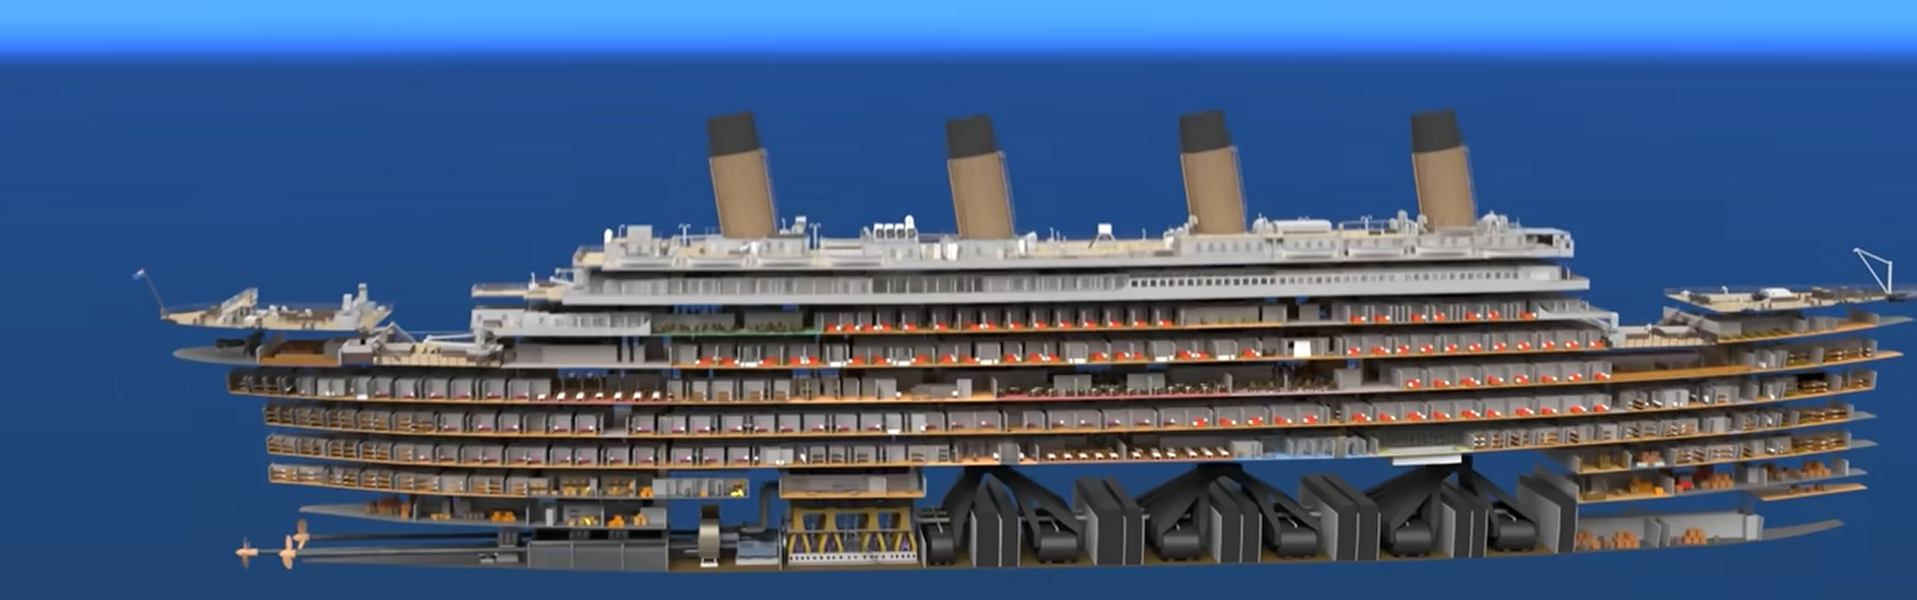

In [729]:
from IPython.display import Image, display

display(Image(filename='titanic.png',width=640,height=480))


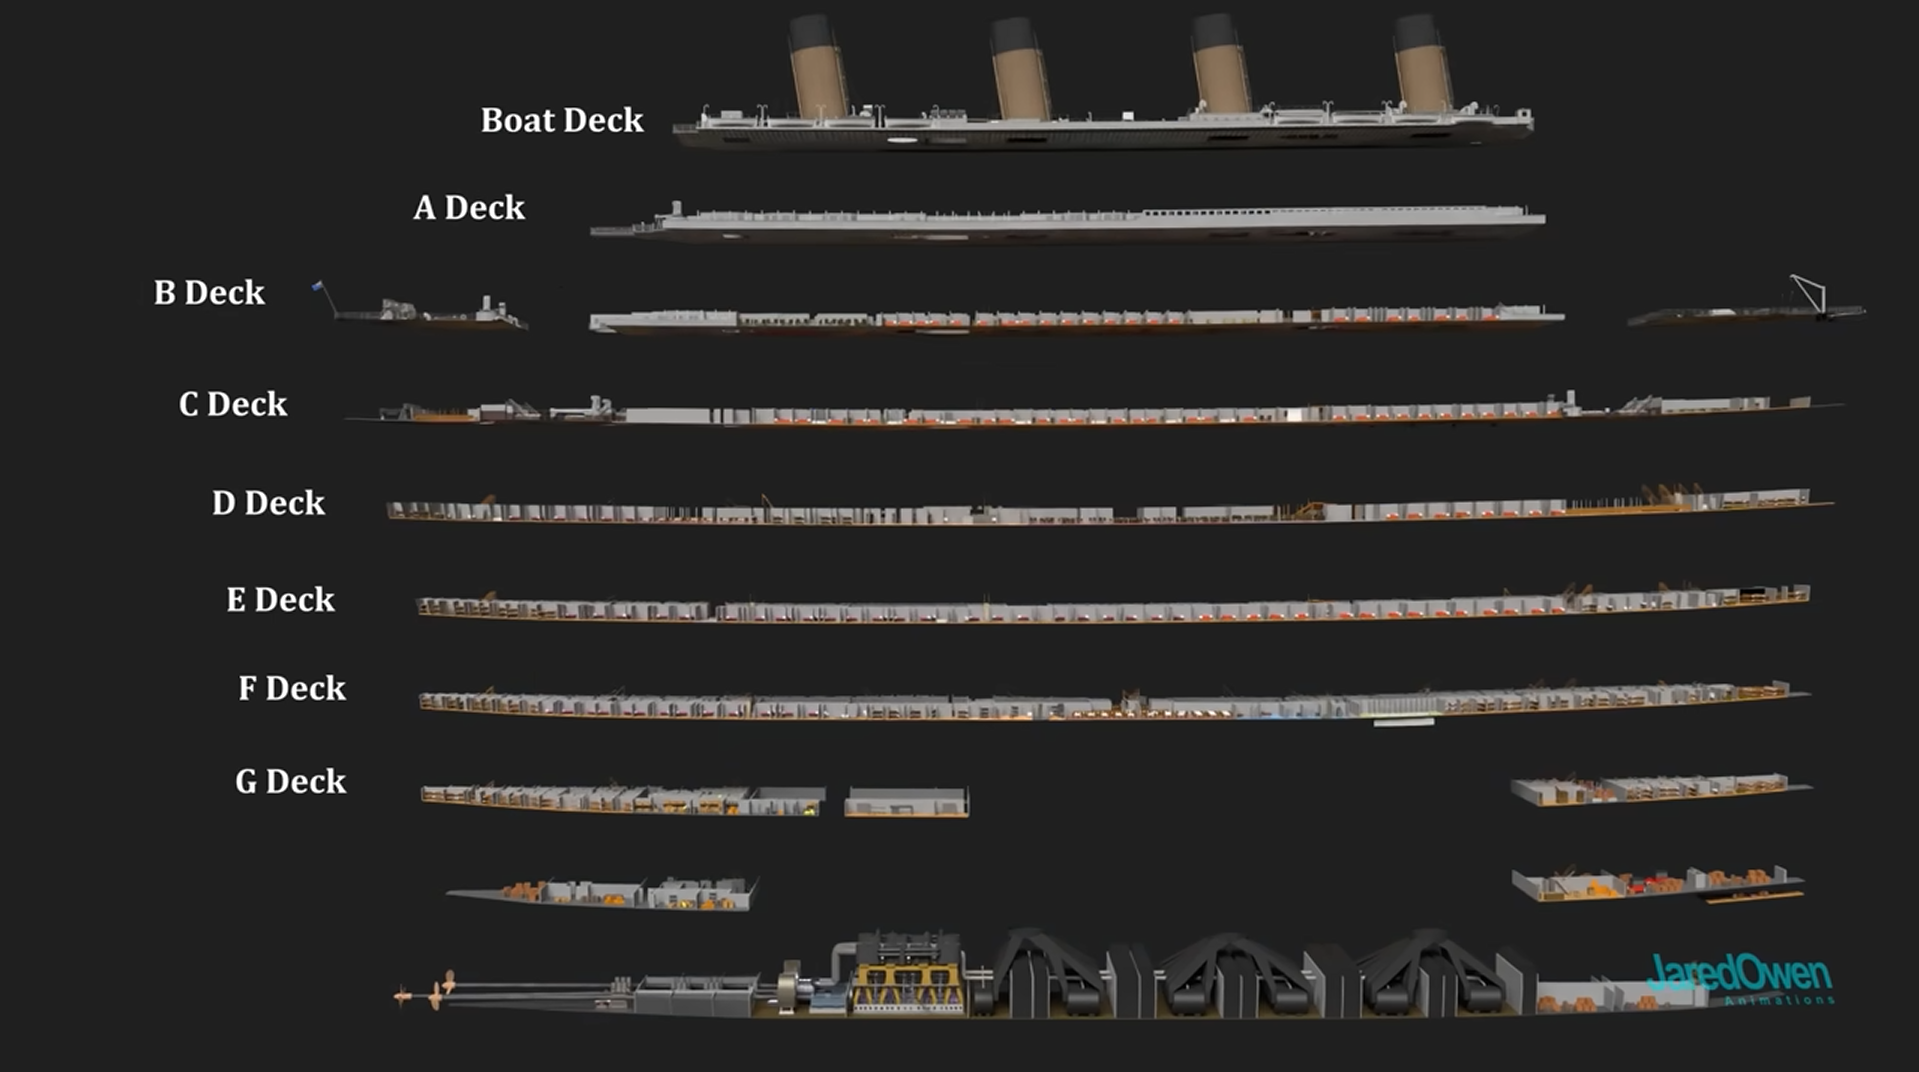

In [730]:
display(Image(filename='decks.png',width=640,height=480))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11196\3184086821.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate_by_deck.index, y=survival_rate_by_deck.values, palette='coolwarm')


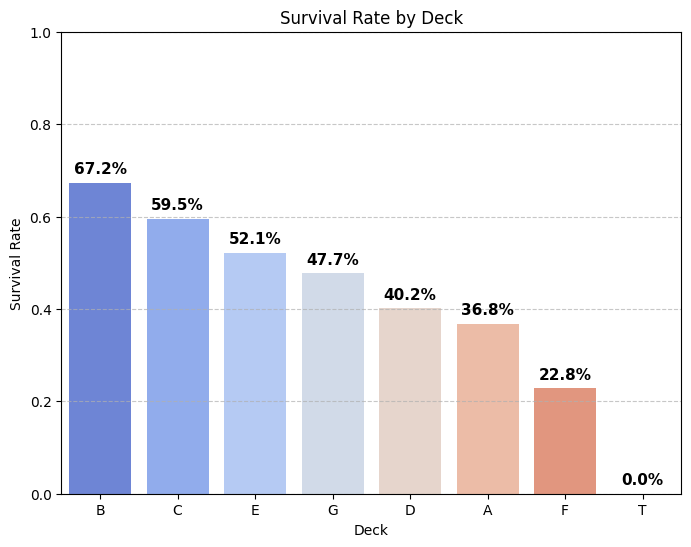

In [731]:
# Drop rows where 'Deck' is missing
deck_survival = df.dropna(subset=['Deck'])

# Calculate survival rate per deck
survival_rate_by_deck = deck_survival.groupby('Deck')['Survived'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=survival_rate_by_deck.index, y=survival_rate_by_deck.values, palette='coolwarm')

plt.title('Survival Rate by Deck')
plt.xlabel('Deck')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with percentages
for i, v in enumerate(survival_rate_by_deck.values):
    plt.text(i, v + 0.02, f'{v*100:.1f}%', ha='center', fontsize=11, fontweight='bold')

plt.show()


Q4: What is the relation of survival with Age?

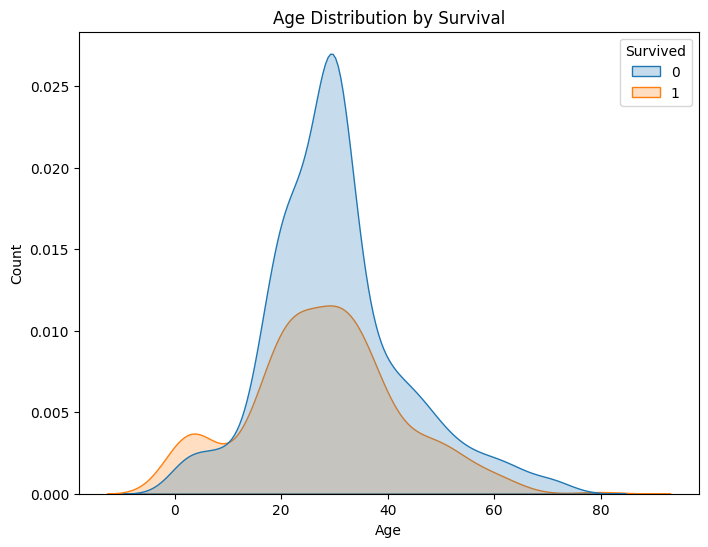

In [732]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)

plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Children survived more w.r.t their numbers. However, Overall middle-age people survived more as they were also large in number

Q5: What class of Passengers survived more?

In [733]:
# Count survivors per class
survival_by_class = df.groupby('Pclass')['Survived'].sum()  # number of survivors in each class

# Optional: also get total passengers per class to calculate percentage
total_by_class = df['Pclass'].value_counts().sort_index()
survival_percentage = (survival_by_class / total_by_class * 100).sort_index()

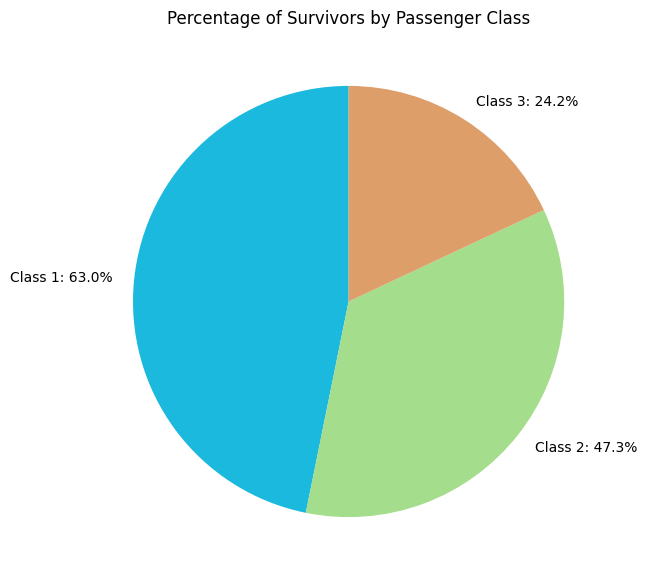

In [734]:
labels = [f'Class {cls}: {perc:.1f}%' for cls, perc in survival_percentage.items()]

plt.figure(figsize=(7,7))
plt.pie(survival_percentage, labels=labels, colors=["#1ab9dd","#A4DD8B","#DD9E6A"], startangle=90)
plt.title('Percentage of Survivors by Passenger Class')
plt.show()


High Class Passengers survived the most (63%)

Q6: What kind of Grouping survived the most? Who travelled Alone, or Families or Friends?

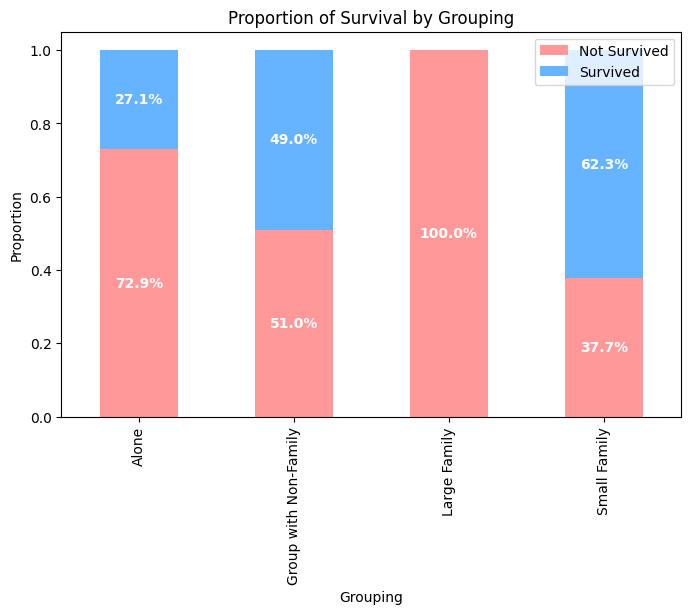

In [735]:
import matplotlib.pyplot as plt

# Calculate survival proportion by Grouping
survival_by_group = df.groupby('Grouping')['Survived'].value_counts(normalize=True).unstack(fill_value=0)

# Plot stacked bar chart
ax = survival_by_group.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'], figsize=(8,5))

plt.ylabel('Proportion')
plt.title('Proportion of Survival by Grouping')
plt.legend(['Not Survived', 'Survived'], loc='upper right')

# Annotate percentages inside bars
for i, group in enumerate(survival_by_group.index):
    bottom = 0
    for j, surv in enumerate([0,1]):  # 0: Not Survived, 1: Survived
        value = survival_by_group.loc[group, surv]
        if value > 0:  # only annotate if the segment exists
            ax.text(i, bottom + value/2, f'{value*100:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
            bottom += value

plt.show()


Interesting! Small Family survived the most where Large Family could not survive at all as because it was hard for everyone of the family to survive, not even by luck.

Q7: What title of people survived the most?

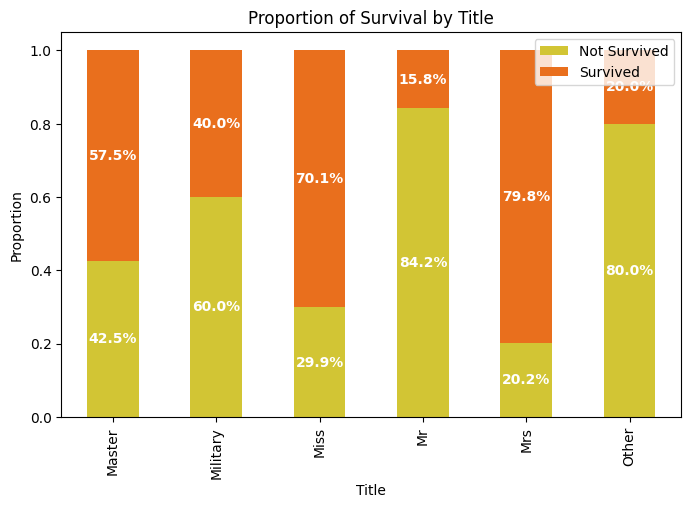

In [736]:
# Calculate survival proportion by Grouping
survival_by_group = df.groupby('Title')['Survived'].value_counts(normalize=True).unstack(fill_value=0)

# Plot stacked bar chart
ax = survival_by_group.plot(kind='bar', stacked=True, color=["#d2c534","#e96f1d"], figsize=(8,5))

plt.ylabel('Proportion')
plt.title('Proportion of Survival by Title')
plt.legend(['Not Survived', 'Survived'], loc='upper right')

# Annotate percentages inside bars
for i, group in enumerate(survival_by_group.index):
    bottom = 0
    for j, surv in enumerate([0,1]):  # 0: Not Survived, 1: Survived
        value = survival_by_group.loc[group, surv]
        if value > 0:  # only annotate if the segment exists
            ax.text(i, bottom + value/2, f'{value*100:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
            bottom += value

plt.show()


Young boys (Master) survived more than Adult/Married persons (Mr) as fitness and family responsibility    
   
Married Woman (Mrs) survived slightly higher than unmarried (Miss). The cause might be children and women were given the most priority and married women mostly had children with them. However, overall both of Miss and Mrs survived more than men, even young men.   
   
Military and other titles were rare and the survival rate is very low for misfortune.

Q8: Did passenger with high Fare survived more? Did money bring them luck?

<Axes: xlabel='Survived', ylabel='Fare'>

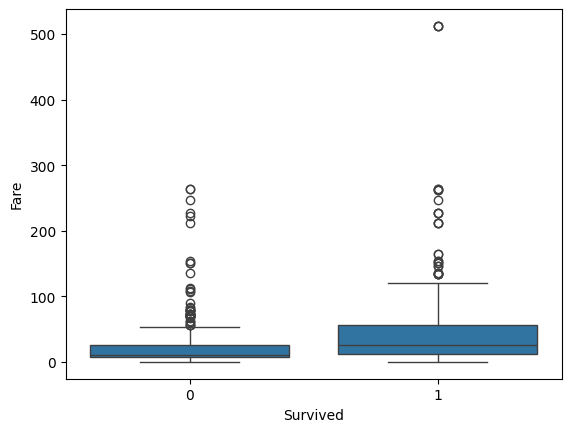

In [737]:
sns.boxplot(x='Survived', y='Fare', data=df)


Those who did not survive tend to have lower median and passengers with higher Fare had higher probability of survival. Though the difference is not mentionable but still higher pay had more chance of survival nonetheless.

<Axes: xlabel='Fare', ylabel='Count'>

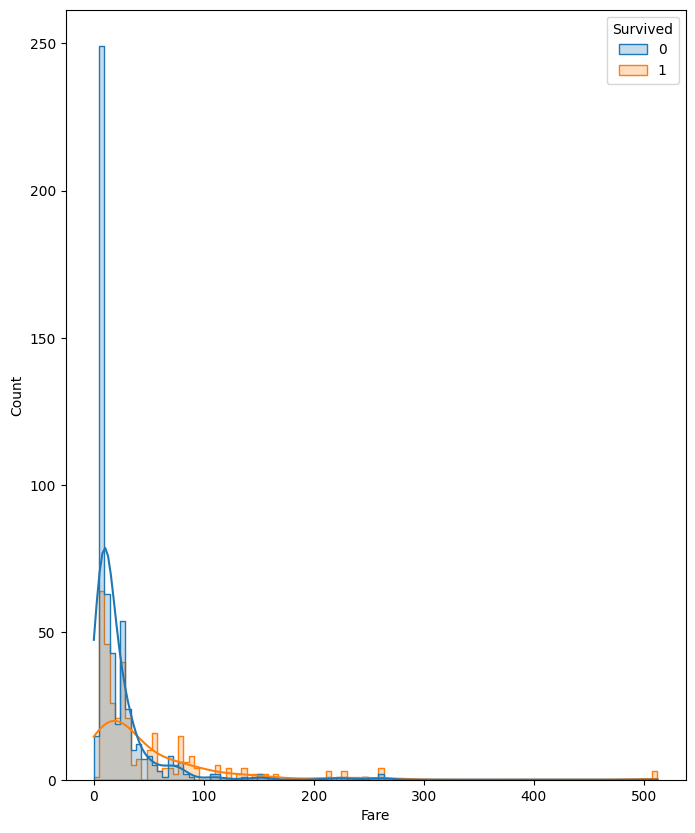

In [738]:
plt.figure(figsize=(8,10))
sns.histplot(data=df, x='Fare', hue='Survived', kde=True, element='step')


This histplot again shows those who paid more had higher survival though the numer of high paying passengers were low.  
So, money brought them luck!

************************************************************************************************************************************************************

**Model**

In [739]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Deck,Grouping
0,0,3,male,22.0,7.25,S,Mr,F,Group with Non-Family
1,1,1,female,38.0,71.28,C,Mrs,C,Group with Non-Family
2,1,3,female,26.0,7.92,S,Miss,E,Alone
3,1,1,female,35.0,53.10,S,Mrs,C,Small Family
4,0,3,male,35.0,8.05,S,Mr,E,Alone


In [740]:
One_hot_cols=['Sex','Embarked','Title','Deck','Grouping'] #Pclass LabelEncoded as Ordinal values

In [741]:
# === Imports ===
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [742]:
# Define X and y
X = df.drop('Survived', axis=1)
y = df['Survived']

In [743]:
# OneHotEncode the defined columns
ct = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(drop='first', sparse_output=False), One_hot_cols)],
    remainder='passthrough'
)


In [744]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Deck,Grouping
0,0,3,male,22.0,7.25,S,Mr,F,Group with Non-Family
1,1,1,female,38.0,71.28,C,Mrs,C,Group with Non-Family
2,1,3,female,26.0,7.92,S,Miss,E,Alone
3,1,1,female,35.0,53.10,S,Mrs,C,Small Family
4,0,3,male,35.0,8.05,S,Mr,E,Alone


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:30:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.815642   0.788732  0.756757  0.772414
1        Random Forest  0.826816   0.779221  0.810811  0.794702
2              XGBoost  0.826816   0.779221  0.810811  0.794702


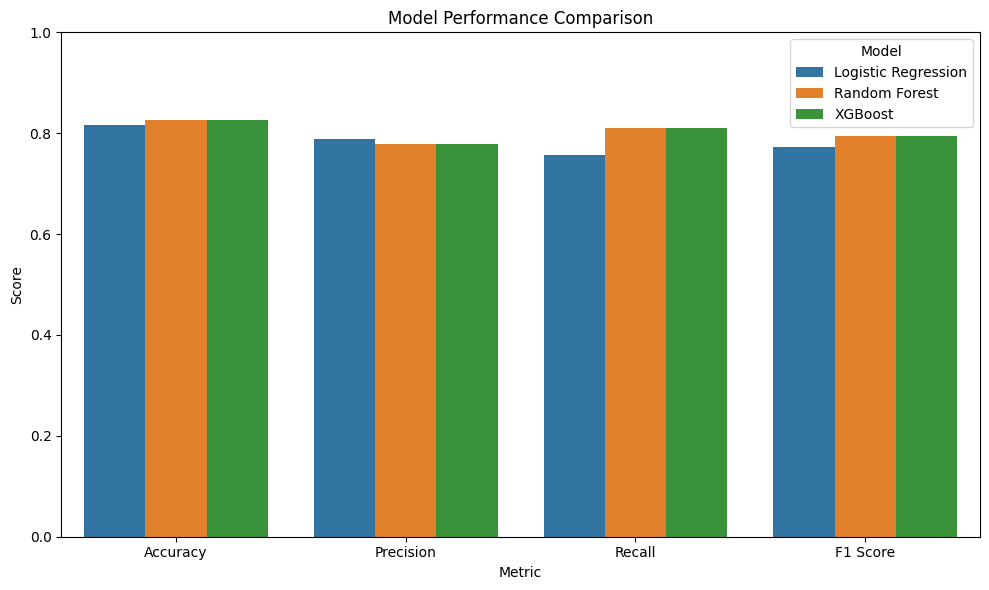

In [745]:
# === Split Data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Models ===
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# === Train & Evaluate ===
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for name, model in models.items():
    pipe = Pipeline(steps=[('encoder', ct), ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1 Score'].append(f1_score(y_test, y_pred))

results = pd.DataFrame(metrics)

# === Display results ===
print(results)

# === Plot Comparison ===
plt.figure(figsize=(10, 6))
results_melted = results.melt(id_vars='Model', var_name='Metric', value_name='Score')

sns.barplot(data=results_melted, x='Metric', y='Score', hue='Model')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


RandomForest was chosen for the best balance of precision, recall and accuracy of 82.68%